# Graphs for Dashboard

### Importing all the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import json
import ast
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random

### Importing the movies dataset

In [2]:
movies_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\movies_metadata.csv")
movies_df.head()

C:\Users\Jatin Dhall\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Importing the ratings dataset

In [3]:
ratings_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


### Importing the links dataset

In [4]:
links_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\links.csv")
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Importing the credits dataset

In [5]:
credits_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\credits.csv")
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### Importing the keywords dataset

In [6]:
keywords_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\keywords.csv")
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


# Handling missing values

In [7]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [8]:
movies_df = movies_df.drop(columns = ["belongs_to_collection","homepage","tagline"],axis = 1)

In [9]:
movies_df = movies_df.dropna(axis = 0, how ='any')

In [10]:
movies_df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

### Removing the rows containing either budget or revenue as 0

In [11]:
#Filtering out all the rows where budget or revenue is 0
df_filtered = movies_df[(movies_df['budget'] != "0")]
df_filtered = df_filtered[(movies_df['revenue'] != 0.0)]
df_filtered.head()

<ipython-input-11-ec90a61dd1d6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(movies_df['revenue'] != 0.0)]


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
8,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0


In [12]:
print(df_filtered.dtypes)

adult                    object
budget                   object
genres                   object
id                       object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity               object
poster_path              object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object


### Converting the datatype of columns budget, popularity and runtime

In [13]:
df_filtered['budget'] = pd.to_numeric(df_filtered['budget'])
df_filtered['popularity'] = pd.to_numeric(df_filtered['popularity'])
df_filtered['runtime'] = pd.to_numeric(df_filtered['runtime'])

In [14]:
print(df_filtered.dtypes)

adult                    object
budget                    int64
genres                   object
id                       object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object


In [15]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
links_df.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [17]:
links_df = links_df.dropna(axis = 0,how = "any")

In [18]:
links_df.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [19]:
keywords_df.isnull().sum()

id          0
keywords    0
dtype: int64

In [20]:
credits_df.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [21]:
budgetList = list(pd.to_numeric(df_filtered["budget"]))
revenueList = list(pd.to_numeric(df_filtered["revenue"]))

### Getting the genre list

In [22]:
#Code to get a list of all the genres
#ADD A LIST IN A LIST, SO THAT FOR EACH MOVIE, ALL THE GENRES ARE PUT IN THE NESTED LIST


genreListEncoded = df_filtered["genres"]
genreListEncoded = list(genreListEncoded)
genreList = []
for i in genreListEncoded:
    i = ast.literal_eval(i)
    for j in i:
        genreList.append(j['name'])

genreset = set(genreList)
# convert the set to the list
genres = (list(genreset))
print(genres)

['Adventure', 'Documentary', 'Music', 'Western', 'Animation', 'Fantasy', 'Science Fiction', 'Drama', 'Foreign', 'History', 'TV Movie', 'Thriller', 'Horror', 'Comedy', 'Crime', 'War', 'Action', 'Family', 'Romance', 'Mystery']


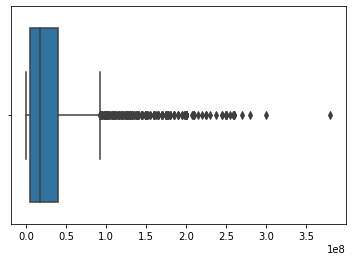

In [23]:
sns.boxplot(x = budgetList)

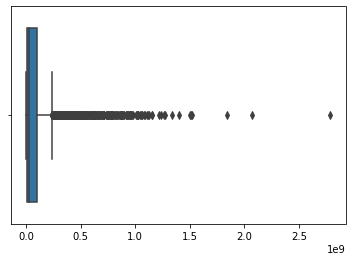

In [24]:
sns.boxplot(x = revenueList)

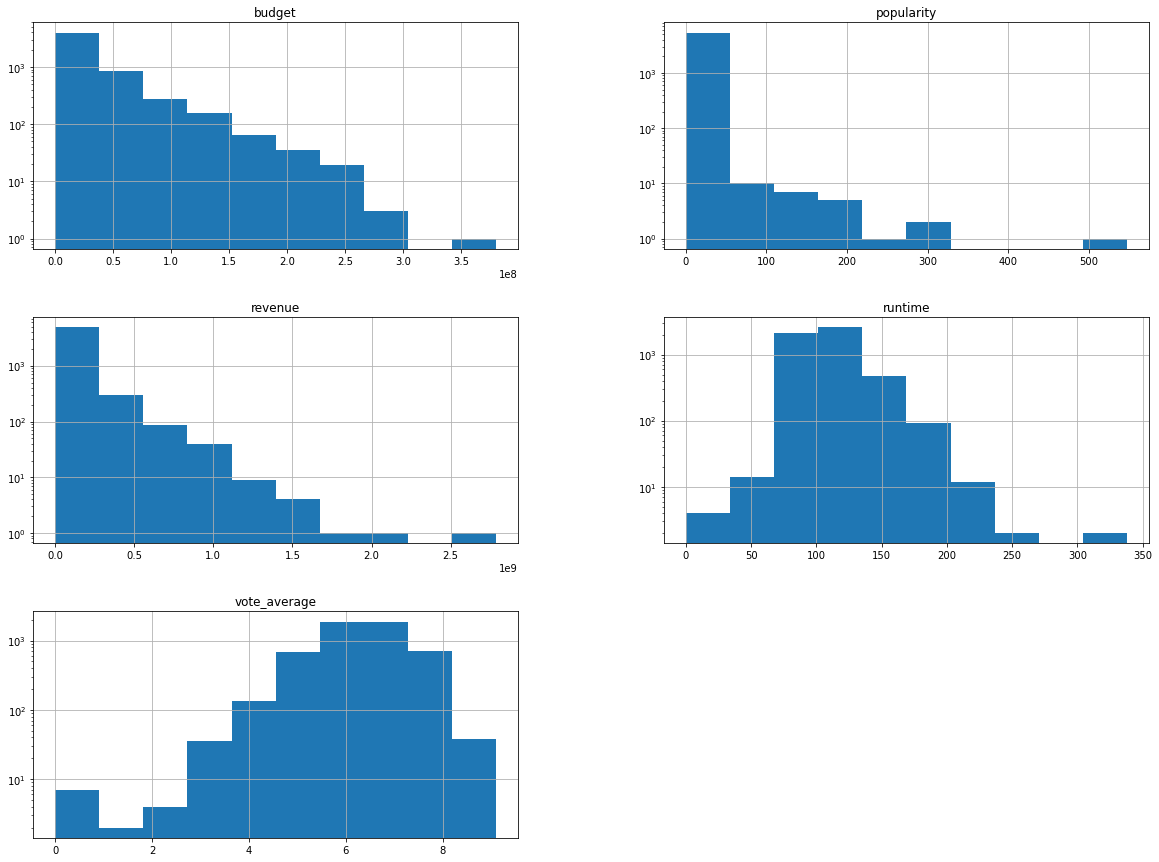

In [25]:
#Histograms
df_filtered[['budget'] + ['popularity'] + ['revenue'] + ['runtime'] + ['vote_average']].hist(figsize=(20,15), log=True);

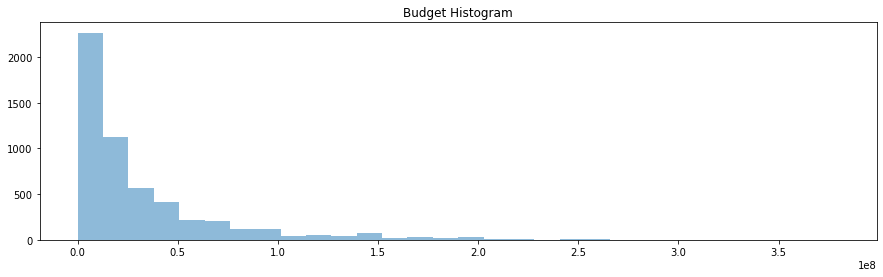

In [26]:
#Histogram for Budget
# Increase the width
plt.figure(figsize=(15,4))
plt.hist(budgetList, bins=30, alpha=0.5)
plt.title('Budget Histogram')
# plt.xlabel('Release Dates')
# plt.ylabel('No. of movies')

plt.show()

### Scatterplot for Runtime vs Budget

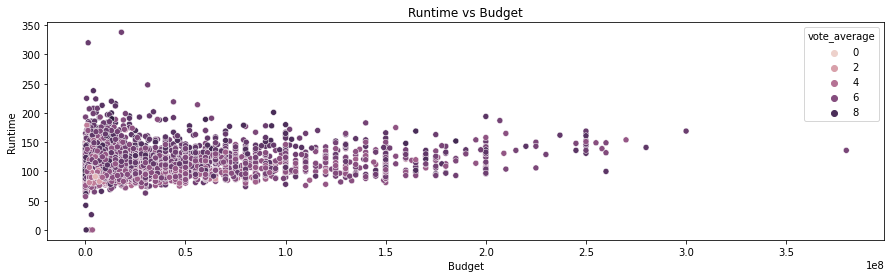

In [27]:
runtime_data = list(df_filtered["runtime"])
vote_avg = df_filtered['vote_average']
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = runtime_data,hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Runtime')
plt.title('Runtime vs Budget')
plt.show()

### Revenue vs Budget Scatterplot

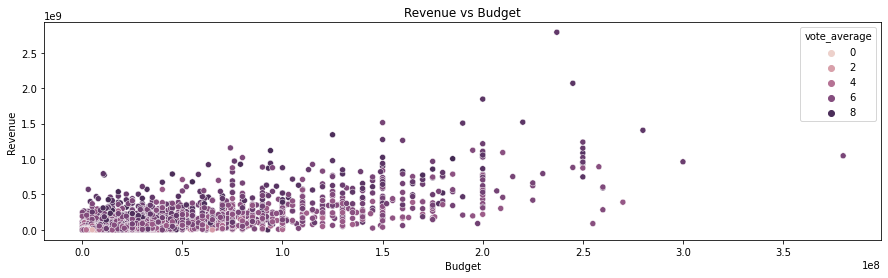

In [28]:
#Using hue as ratings or genres with respect to vote avg
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = revenueList,hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()

### Finding correlation between Budget vs Revenue

In [29]:
corr, _ = pearsonr(budgetList, revenueList)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.730


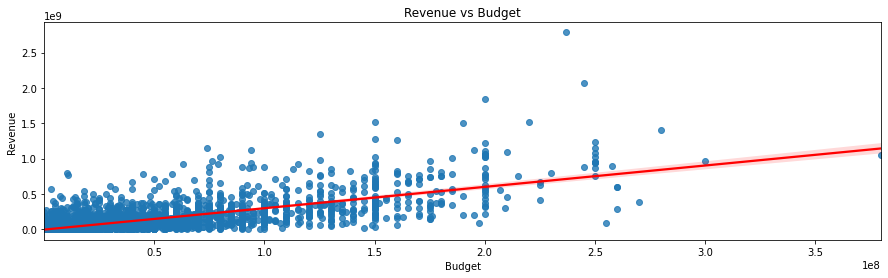

In [30]:
# Increase the width
plt.figure(figsize=(15,4))
#Display regression plot using seaborn
sns.regplot(x = budgetList,y = revenueList,line_kws={'color':'red'})
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()

### Correlation Heatmap

In [31]:
#Displaying the correlation between all the numeric rows
cor = df_filtered.corr()
print(cor)

                budget  popularity   revenue   runtime  vote_average  \
budget        1.000000    0.307660  0.730119  0.191301     -0.007802   
popularity    0.307660    1.000000  0.440255  0.088349      0.160748   
revenue       0.730119    0.440255  1.000000  0.189628      0.166954   
runtime       0.191301    0.088349  0.189628  1.000000      0.317473   
vote_average -0.007802    0.160748  0.166954  0.317473      1.000000   
vote_count    0.586329    0.478524  0.770465  0.200968      0.318809   

              vote_count  
budget          0.586329  
popularity      0.478524  
revenue         0.770465  
runtime         0.200968  
vote_average    0.318809  
vote_count      1.000000  


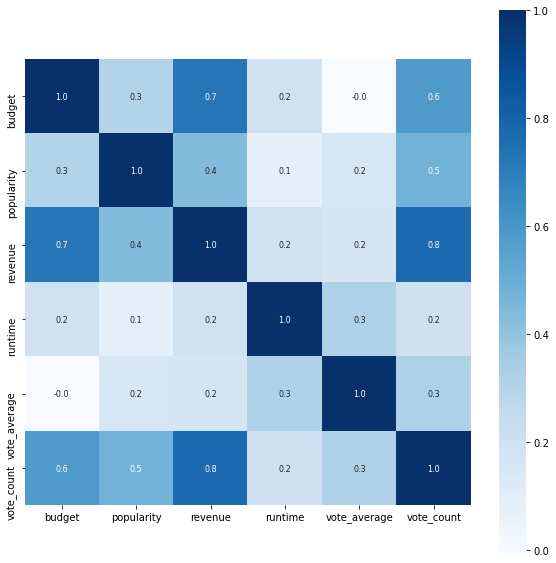

In [32]:
#Constructing a heat map to understand the correlation between the columns
plt.figure(figsize = (10,10))
sns.heatmap(cor, cbar = True , square = True,fmt = '.1f', annot = True, annot_kws = {'size' : 8},  cmap = 'Blues')

In [33]:
#Counting correlation of 0.5 and above as high correlation between columns
#Columns with high correlation
#buget and revenue - 0.7
#budget and vote_count - 0.6
#popularity and vote_count - 0.5
#revenue and vote_count - 0.8

### Scatterplots for all the above high correlation columns

#### Budget vs Vote_count

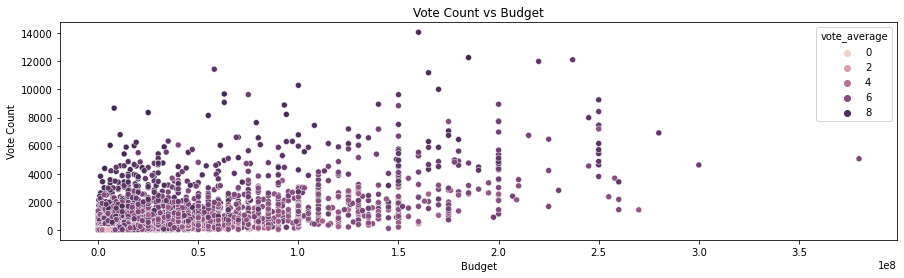

In [34]:
#Using hue as vote avg
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = list(df_filtered["vote_count"]),hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Vote Count')
plt.title('Vote Count vs Budget')
plt.show()

#### Popularity and vote count

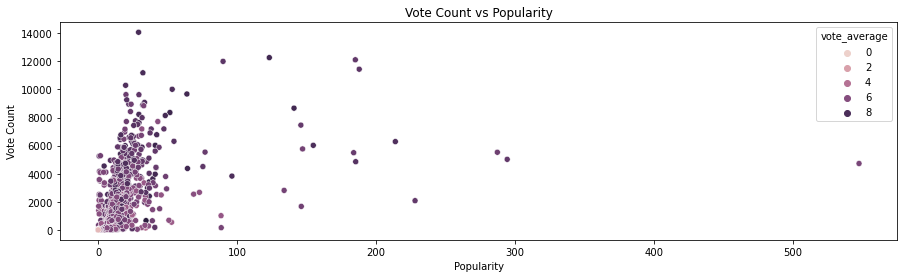

In [35]:
#Using hue as vote avg
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = list(df_filtered['popularity']),y = df_filtered['vote_count'],hue = vote_avg)
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.title('Vote Count vs Popularity')
plt.show()

#### Revenue and Vote Count

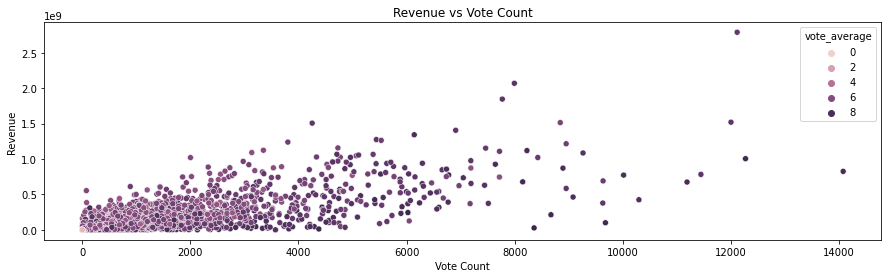

In [36]:
#Using hue as vote avg
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = list(df_filtered['vote_count']),y = revenueList,hue = vote_avg)
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Revenue vs Vote Count')
plt.show()

## Linear Regression Models for Columns with correlation of 0.7 and above

### Applying Linear Regression on Revenue and Budget

In [37]:
#Lower the rmse value, better the Regression Model(scaled to the range of data)

import math
model = LinearRegression()
#Normalizing the data for it to be in a range between 0 and 1
x = [(m -min(budgetList))/(max(budgetList) - min(budgetList)) for m in budgetList]
y = [(m -min(revenueList))/(max(revenueList) - min(revenueList)) for m in revenueList]
x = np.array(x)
x = x.reshape(-1,1)
y = np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
model.fit(x_train,y_train)
pred = model.predict(x_test)

mse = metrics.mean_squared_error(pred, y_test)

rmse = math.sqrt(mse)

print(rmse)

print("Budget is in the range : ",min(x),max(x))
print("Revenue is in the range : ",min(y),max(y))

0.04147298742093338
Budget is in the range :  [0.] [1.]
Revenue is in the range :  0.0 1.0


### Applying Linear Regression on Revenue vs Vote count

#### Regression Plot

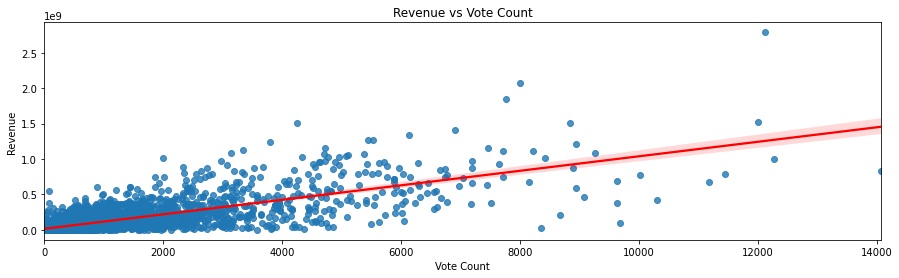

In [38]:
# Increase the width
plt.figure(figsize=(15,4))
#Display regression plot using seaborn
sns.regplot(x = list(df_filtered['vote_count']),y = revenueList,line_kws={'color':'red'})
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Revenue vs Vote Count')
plt.show()

### Linear Regression

In [39]:
#Lower the rmse value, better the Regression Model(scaled to the range of data)

import math
model = LinearRegression()
vote_count = list(df_filtered["vote_count"])
#Normalizing the data for it to be in a range between 0 and 1
x = [(m -min(vote_count))/(max(vote_count) - min(vote_count)) for m in vote_count]
y = [(m -min(revenueList))/(max(revenueList) - min(revenueList)) for m in revenueList]
x = np.array(x)
x = x.reshape(-1,1)
y = np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
model.fit(x_train,y_train)
pred = model.predict(x_test)

mse = metrics.mean_squared_error(pred, y_test)

rmse = math.sqrt(mse)

print(rmse)

print("Vote Count is in the range : ",min(x),max(x))
print("Revenue is in the range : ",min(y),max(y))

0.03907192092651554
Vote Count is in the range :  [0.] [1.]
Revenue is in the range :  0.0 1.0


### Pie Charts

In [40]:
df_filtered.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
8,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0


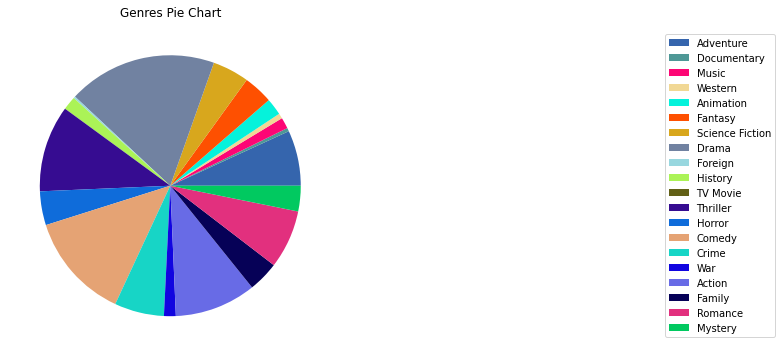

In [41]:
genres_count = []
number_of_colors = len(genres)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

for i in genres:
    count = genreList.count(i)
    genres_count.append(count)

# Increase the width
plt.figure(figsize=(20,6))
plt.pie(genres_count,colors = color)
plt.title("Genres Pie Chart")
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(labels = genres,loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()

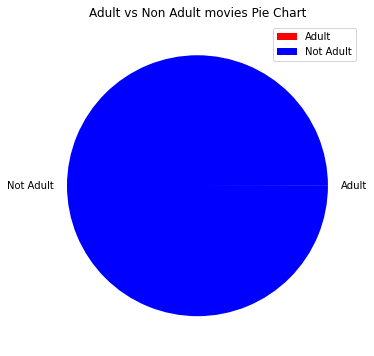

In [42]:
adult_data = list(movies_df['adult'])
count = adult_data.count("True")
count1 = adult_data.count("False")

adult_count = [count,count1]


color = ['r','b']

labels = ["Adult","Not Adult"]
# Increase the width
plt.figure(figsize=(20,6))
plt.title("Adult vs Non Adult movies Pie Chart")
plt.pie(adult_count,colors = color, labels = labels)
plt.legend(labels,loc=1)
plt.show()

In [43]:
# Code to get a list of all the release dates
release_dates = df_filtered["release_date"]
dates = []
for i in release_dates:
    dates.append(int(i[0:4]))
    
print(max(dates))

2017


### Bar chart to show the frequency of the languages

In [44]:
languages = list(df_filtered["original_language"])
uniq_languages = list(set(languages))
lang_count = []
print(uniq_languages)
for i in uniq_languages:
    count = languages.count(i)
    lang_count.append(count)

['da', 'de', 'ml', 'bm', 'af', 'fr', 'hi', 'el', 'nl', 'te', 'en', 'es', 'kn', 'ru', 'id', 'pl', 'nb', 'no', 'tr', 'is', 'ca', 'it', 'fi', 'ja', 'ko', 'zh', 'he', 'hu', 'xx', 'fa', 'vi', 'th', 'sr', 'ro', 'cn', 'mr', 'pt', 'sv', 'ur', 'ta']


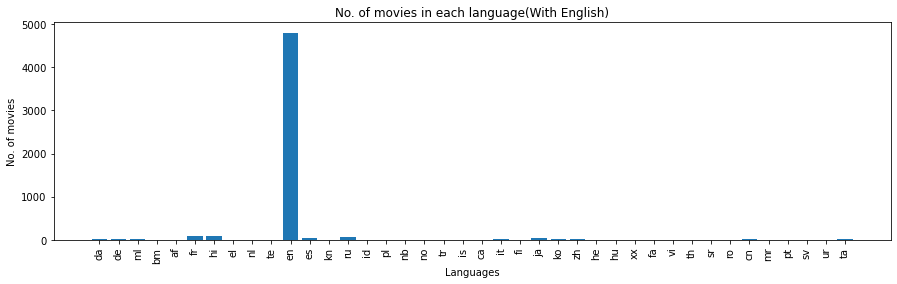

In [45]:
#BAR PLOT WITH EN
# Increase the width
plt.figure(figsize=(15,4))
# Horizontal Bar Plot
plt.bar(uniq_languages, lang_count)

plt.xticks(rotation=90)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title("No. of movies in each language(With English)")
# Show Plot
plt.show()

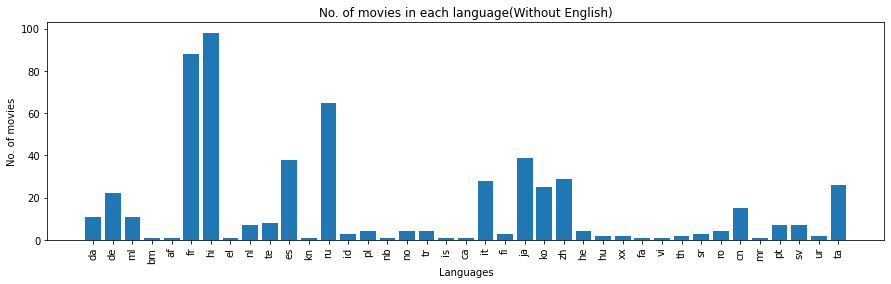

In [46]:
#BAR PLOT WITHOUT EN
uniq_lang_without = []
lang_count_without = []

for i in uniq_languages:
    if i != 'en':
        count = languages.count(i)
        uniq_lang_without.append(i)
        lang_count_without.append(count)

# Increase the width
plt.figure(figsize=(15,4))
# Horizontal Bar Plot
plt.bar(uniq_lang_without, lang_count_without)

plt.xticks(rotation=90)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title("No. of movies in each language(Without English)")
# Show Plot
plt.show()

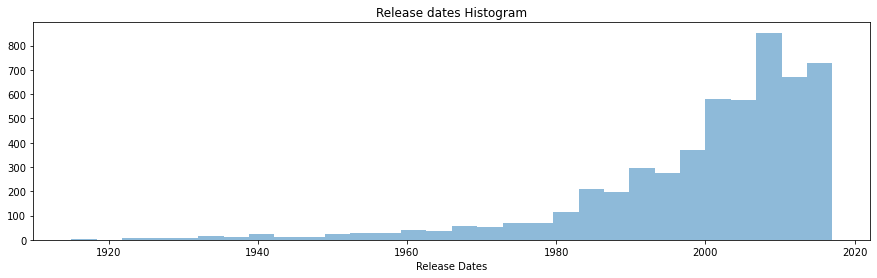

In [47]:
#Histogram for release years
# Increase the width
plt.figure(figsize=(15,4))
plt.hist(dates, bins=30, alpha=0.5)
plt.title('Release dates Histogram')
plt.xlabel('Release Dates')

plt.show()

<class 'list'>
['Lithuania', 'Netherlands', 'Peru', 'Venezuela', 'Costa Rica', 'Spain', 'Hong Kong', 'United Arab Emirates', 'Monaco', 'Puerto Rico', 'Ecuador', 'Luxembourg', 'Namibia', 'Norway', 'Russia', 'Croatia', 'Kazakhstan', 'South Africa', 'South Korea', 'Portugal', 'Singapore', 'Austria', 'Thailand', 'Philippines', 'Finland', 'New Zealand', 'Japan', 'United States of America', 'Germany', 'Israel', 'Canada', 'Bahamas', 'Malaysia', 'Qatar', 'Serbia', 'Mexico', 'Botswana', 'Liechtenstein', 'Chile', 'Cambodia', 'Cyprus', 'Burkina Faso', 'Algeria', 'Morocco', 'Malta', 'Romania', 'Turkey', 'Ukraine', 'United Kingdom', 'Tunisia', 'Argentina', 'Hungary', 'Pakistan', 'Australia', 'India', 'Paraguay', 'Serbia and Montenegro', 'Italy', 'Greece', 'Mali', 'Bulgaria', 'Ghana', 'Brazil', 'Sweden', 'Denmark', 'Iran', 'Colombia', 'Switzerland', 'Slovenia', 'Indonesia', 'Ireland', 'Taiwan', 'France', 'Belgium', 'Poland', 'Czech Republic', 'China', 'Iceland', 'Uruguay', 'Angola']
80
[1, 28, 2, 1,

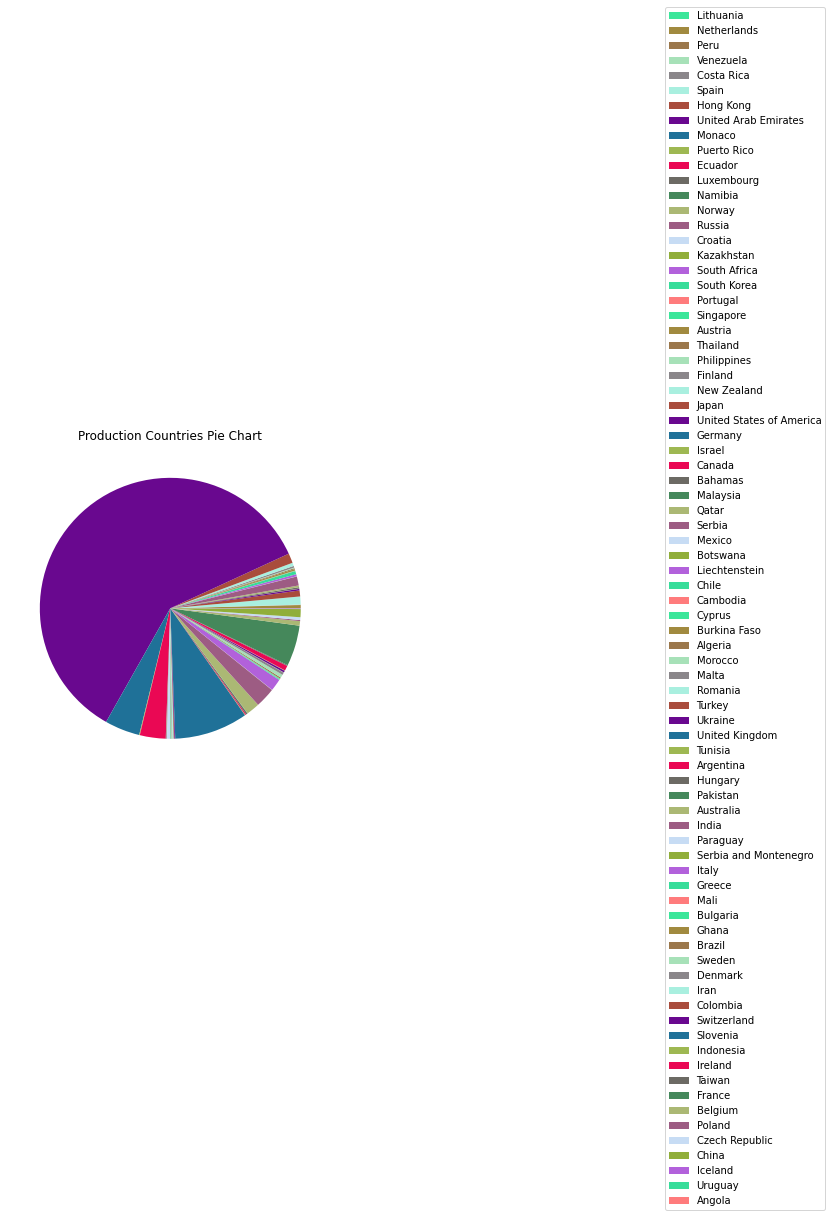

In [48]:
# Pie chart of production countries(Most movies from which countries)
pr_countries = list(df_filtered["production_countries"])
pr_countriesL = []
print(type(pr_countries))
# print(pr_countries)
for i in pr_countries:
    i = ast.literal_eval(i)
    for j in i:
        pr_countriesL.append(j['name'])
        
# print(pr_countriesL)
pr_countrySet = set(pr_countriesL)
pr_countryList = list(pr_countrySet)
print(pr_countryList)

no_of_countries = len(pr_countryList)
print(no_of_countries)

avg = []
for i in pr_countryList:
    count = pr_countriesL.count(i)
    avg.append(count)
    
print(avg)

number_of_colors = len(genres)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Increase the width
plt.figure(figsize=(20,6))
plt.pie(avg,colors = color)
plt.title("Production Countries Pie Chart")
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(labels = pr_countryList,loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()